# Define a function to create a filename


In [1]:
def getFileName(name, n_samples, model_name, layer_name):
    return name \
        + "_{}_".format(n_samples) \
        + "_{}_".format(model_name) \
        + "_{}".format(layer_name)  \
        + ".npy"   

# Load the Model RDM

In [2]:
import os
import numpy as np
model_name = 'resnet34'
layer_name = 'all'
SAVE_PATH = '/mnt/antares_raid/home/agnessa/RSA/' 
NR_OF_SAMPLES = 10000
path = os.path.join(SAVE_PATH + 'Model_RDM/', getFileName("Model_RDM",NR_OF_SAMPLES,model_name,layer_name))

# save np.load - the function was behaving weirdly, and this was the solution
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
Model_RDM = np.load(path)
np.load = np_load_old

# Plot the Model RDM


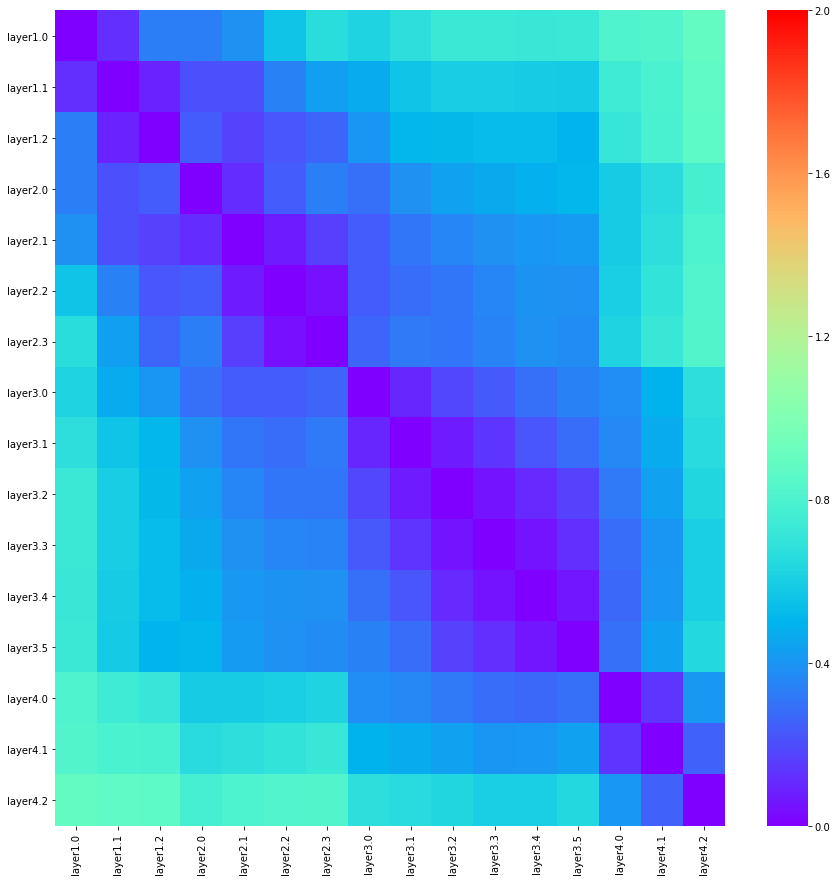

In [5]:
import matplotlib.pyplot as plt
import seaborn
Model_RDM[np.isnan(Model_RDM)]=0.0 
fig = plt.figure(figsize=(15,15))
layer_names = np.array(['layer1.0','layer1.1','layer1.2','layer2.0','layer2.1','layer2.2','layer2.3','layer3.0','layer3.1',
              'layer3.2','layer3.3','layer3.4','layer3.5','layer4.0','layer4.1','layer4.2'])
ax = seaborn.heatmap(1-Model_RDM, xticklabels = layer_names, yticklabels = layer_names, cmap='rainbow', vmin=0.0, vmax=2.0)
plt.xticks(rotation=90) 
plt.yticks(rotation=0)
plt.show()

# Save as a .png file

In [4]:
path = os.path.join(SAVE_PATH + 'Model_RDM_plots', getFileName("Model_RDM",NR_OF_SAMPLES,model_name,layer_name) + '.png')
fig.savefig(path)

# Multidimensional scaling

In [6]:
from sklearn.manifold import TSNE, MDS
mds = MDS(n_components=2, n_init=200, max_iter=2000, eps=0.0001, dissimilarity='precomputed')
data_embedded = mds.fit_transform(1-Model_RDM)

[[ 0.52488891  0.06503465]
 [ 0.36695765  0.1699109 ]
 [ 0.2546504   0.25350009]
 [ 0.22548372  0.09589141]
 [ 0.12290398  0.18533954]
 [ 0.02857485  0.24490734]
 [-0.03134892  0.28272684]
 [-0.02065796  0.02193169]
 [-0.10646696  0.00421435]
 [-0.18403525  0.01121207]
 [-0.20962858 -0.02368086]
 [-0.25126642 -0.02197291]
 [-0.28502222  0.02717534]
 [-0.23280315 -0.29020995]
 [-0.17691332 -0.42181103]
 [-0.02531672 -0.60416949]]


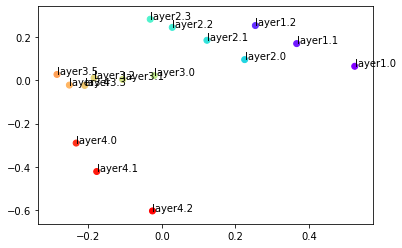

In [14]:
sorted_layers = [1.0,1.1,1.2,2.0,2.1,2.2,2.3,3.0,3.1,3.2,3.3,3.4,3.5,4.0,4.1,4.2]
fig, ax = plt.subplots()
sc = ax.scatter(data_embedded[:, 0], data_embedded[:, 1], c=sorted_layers, cmap = 'rainbow')

for i in range(layer_names.shape[0]):
    ax.annotate(layer_names[i], (data_embedded[i, 0], data_embedded[i, 1]))

plt.show()

In [15]:
path = os.path.join(SAVE_PATH + 'Model_RDM_MDS', getFileName("Model_RDM_MDS",NR_OF_SAMPLES,model_name,layer_name) + '.png')
fig.savefig(path)